<a href="https://colab.research.google.com/github/MuhamadFahmiii/Desain-Analisis-Algoritma/blob/main/Tugas%20dan%20latihan_Pertemuan_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Adjacency Matrix
import numpy as np

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                            [0, 0, 1, 0],
                            [0, 1, 0, 1],
                            [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

#Initialize the pageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
  new_page_rank = np.zeros(num_pages)
  for j in range(num_pages):
    # Calculate the PageRank contribution from each linking page
    linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
    for linking_pages in linking_pages:
        new_page_rank[j] += page_rank[linking_pages] / sum(adjacency_matrix[linking_pages, :])
    new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
  page_rank = new_page_rank

# Print the final PageRank Values
for page, rank in enumerate(page_rank):
    print(f"PR(page {page + 1}) = {rank:.3f}")

PR(page 1) = 0.122
PR(page 2) = 0.302
PR(page 3) = 0.378
PR(page 4) = 0.198


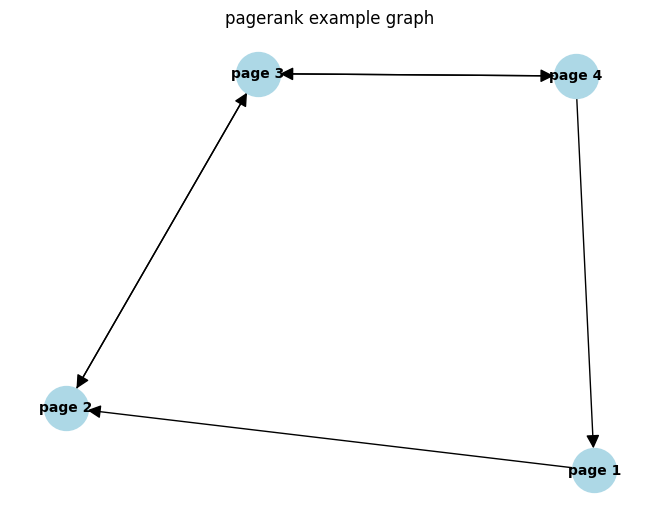

In [ ]:
#membuat graph dari adjency matrix sebelumnya

#membuat graph adjency matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#define the adjency matrix
adjency_matrix = np.array([[0,1,0,0],
                          [0,0,1,0],
                          [0,1,0,1],
                          [1,0,1,0]])
#create a directed graph
G = nx.DiGraph()

#add nodes
num_pages = len(adjency_matrix)
G.add_nodes_from(range(num_pages))

#add edges based on the adjjency matrix
for i in range(num_pages):
  for j in range(num_pages):
    if adjency_matrix[i, j] == 1:\
      G.add_edge(i, j)

#draw the graph
pos = nx.spring_layout(G) #layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("pagerank example graph")
plt.show()

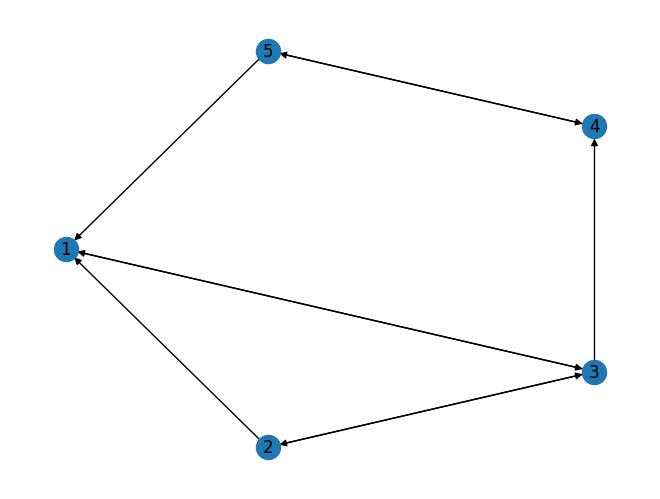

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [ ]:
#halaman 33
import networkx as nx
import numpy as np

def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph) #menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set)/float(nodes_set)
    return G,p

#contoh penggunaan
myWeb = nx.DiGraph()
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_edges_from(connections)

G, p = createPageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [ ]:
#halaman 41
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                            [0, 0, 1, 0, 0],
                            [1, 0, 0, 0, 0],
                            [0, 0, 1, 0, 1],
                            [0, 0, 1, 1, 0],])

#Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

from networkx.readwrite.json_graph import adjacency
for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      #perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normalisasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [ ]:
#slide 43
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  # Terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


In [ ]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('WARN: G is substochastic')
  return G,p


G, p = createPageRank(myWeb)
print (G)

[[0.         0.33333333 0.5        0.         0.5       ]
 [1.         0.         0.5        0.         0.        ]
 [0.         0.33333333 0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


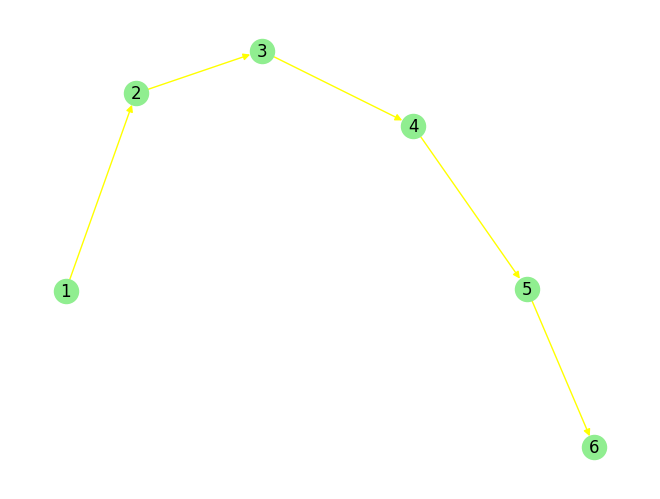

WARN: G is substochastic
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
#latihan 1
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

In [ ]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('WARN: G is substochastic')
  return G,p


G, p = createPageRank(myWeb)
print (G)


WARN: G is substochastic
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


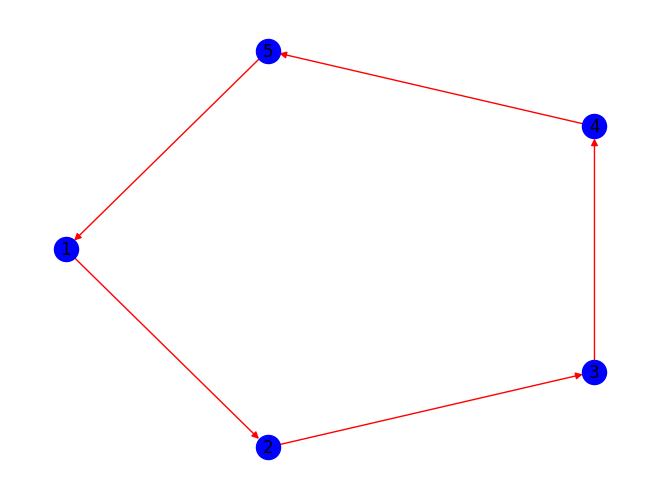

In [ ]:
#latihan 2
myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,2),(2,3),(3,4),(4,5),(5,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='b', edge_color='r')
plt.show()

In [ ]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('WARN: G is substochastic')
  return G,p


G, p = createPageRank(myWeb)
print (G)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


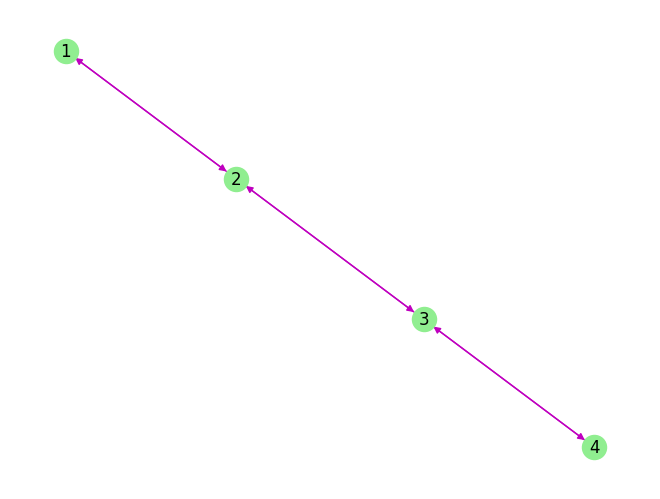

[[0.  0.5 0.  0. ]
 [1.  0.  0.5 0. ]
 [0.  0.5 0.  1. ]
 [0.  0.  0.5 0. ]]


In [ ]:
#latihan 3
myWeb = nx.DiGraph()
myPages = range(1,4)

connections = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=1)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='m')
plt.show()
G,p = createPageRank (myWeb)
print (G)

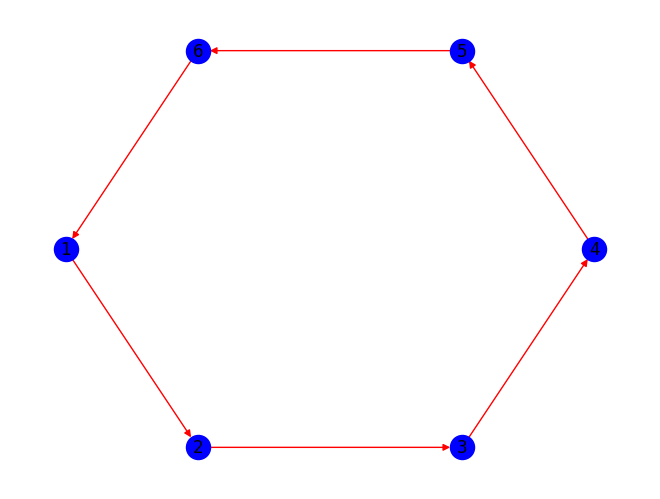

In [ ]:
#latihan 4
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='b', edge_color='r')
plt.show()

In [ ]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('WARN: G is substochastic')
  return G,p


G, p = createPageRank(myWeb)
print (G)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


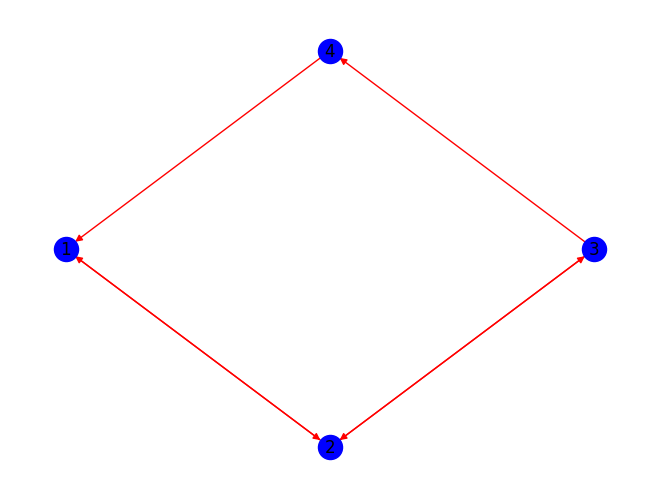

In [ ]:
#latihan 5
myWeb = nx.DiGraph()
myPages = range(1,4)

connections = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='b', edge_color='r')
plt.show()

In [ ]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('WARN: G is substochastic')
  return G,p


G, p = createPageRank(myWeb)
print (G)

[[0.  0.5 0.  1. ]
 [1.  0.  0.5 0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]]


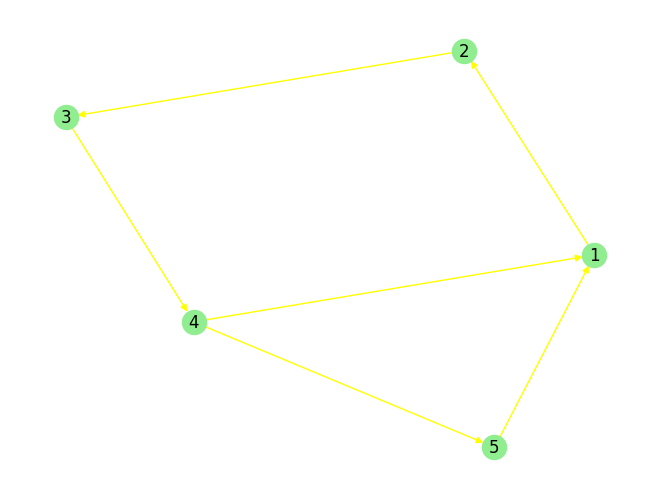

[[0.  0.  0.  0.5 1. ]
 [1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.5 0. ]]


In [ ]:
#Latihan 6

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,2),(2,3),(3,4),(4,1),(4,5),(5,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.kamada_kawai_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank(myWeb)
print (G)

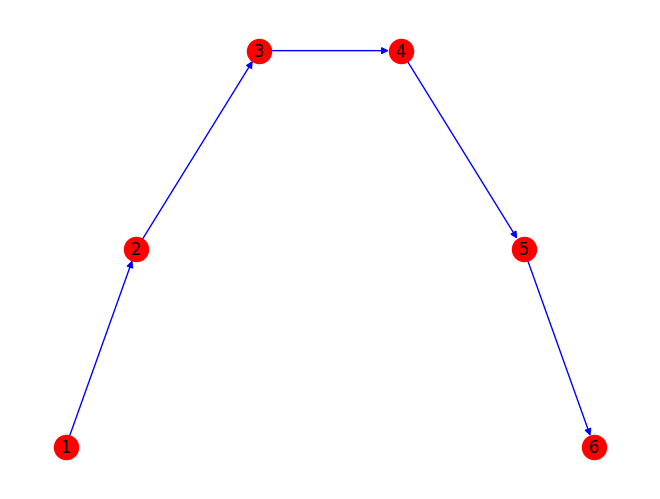

WARN: G is substochastic
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
#Latihan 7

myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spectral_layout(myWeb)
#pos=nx.spiral_layout(myWeb, resolution=0.57, scale=4)

nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='r', edge_color='b')
plt.show()
G, p = createPageRank(myWeb)
print (G)

penerapan algoritma PageRank dalam permasalahan sosial yaitu untuk Penilaian Kualitas Pendidikan: Dalam konteks pendidikan, PageRank bisa digunakan untuk mengevaluasi dan peringkat institusi pendidikan berdasarkan kualitas pengajaran, kinerja siswa, dan kontribusi mereka terhadap masyarakat. Dengan demikian, algoritma ini dapat membantu dalam peningkatan mutu pendidikan dan algoritma PageRank juga bisa digunakan untuk Evaluasi Keberhasilan Program Sosial:
Algoritma PageRank dapat membantu dalam mengevaluasi program-program sosial dan amal dengan mengukur dampak positif yang mereka miliki pada komunitas tertentu. Ini memungkinkan penyedia program untuk menyesuaikan strategi mereka dan mengalokasikan sumber daya dengan lebih baik.